In [80]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [81]:
df= pd.read_csv('Bengaluru_House_Data.csv')
df.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [82]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<Axes: xlabel='balcony', ylabel='Count'>

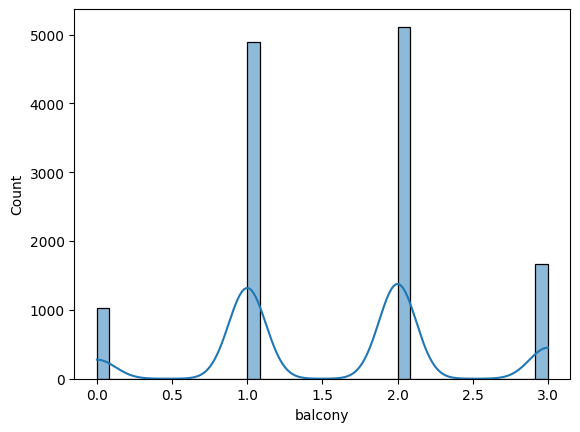

In [83]:
sns.histplot(df['balcony'].dropna(), kde=True)

## MAX ABSOLUTE SCALING

In [84]:
## VALYE/MAX VALUE

In [85]:
df_temp = df.copy()

In [86]:
df_temp['balcony'] = df_temp['balcony'] / df_temp['balcony'].abs().max()

<Axes: xlabel='price', ylabel='Count'>

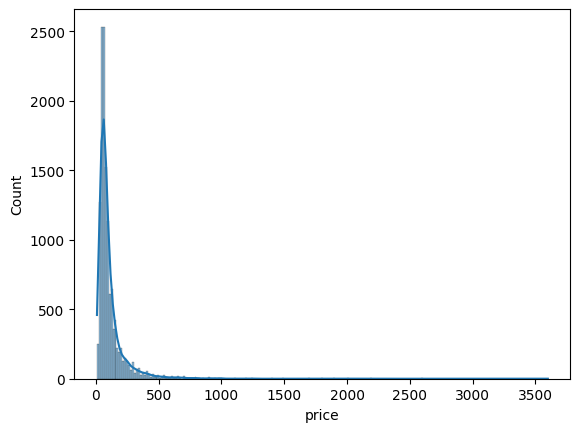

In [87]:
sns.histplot(df['price'].dropna(), kde=True)

In [88]:
## originial_value = scaled_value * (max)

## MIN-MAX SCALING

In [89]:
## value-min / max-min

In [90]:
df_temp = df.copy()

In [91]:
df_temp['price']= (df_temp['price'] - df_temp['price'].min())/ (df_temp['price'].max() - df_temp['price'].min())

<Axes: xlabel='price', ylabel='Count'>

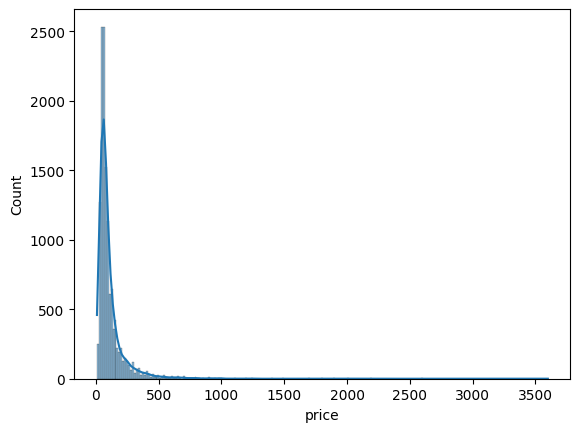

In [92]:
sns.histplot(df['price'].dropna(), kde=True)

In [93]:
#originial_value = scaled_value * (max-min) +min

### Log Transformation

<Axes: xlabel='balcony', ylabel='Density'>

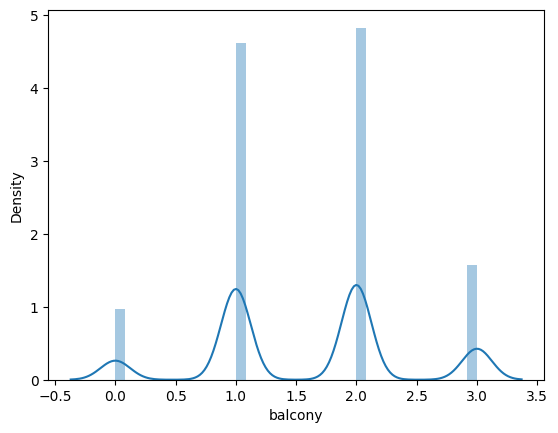

In [94]:
 
sns.distplot(df['balcony'])

In [95]:
df_temp= df.copy()

In [96]:
df_temp['balcony']= np.log(df_temp['balcony']+1)

<Axes: xlabel='balcony', ylabel='Density'>

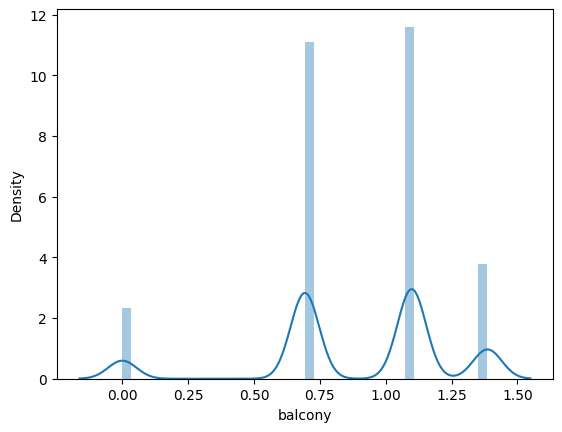

In [97]:
sns.distplot(df_temp['balcony']) 

## Standardization of Data

In [98]:
## z_score method#
# scaled_value= value- mean/std

In [99]:
## original_value = scaled_value * std+ mean

<Axes: xlabel='price', ylabel='Density'>

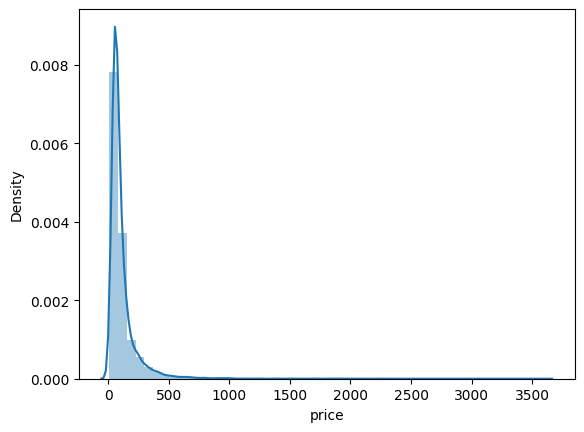

In [100]:
sns.distplot(df['price'])

In [101]:
scaled_data= df.copy()

In [102]:
##apply the formula
for col in ['price']:
    scaled_data[col] = (scaled_data[col] -  scaled_data[col].mean())/ scaled_data[col].std()
 

<Axes: xlabel='price', ylabel='Density'>

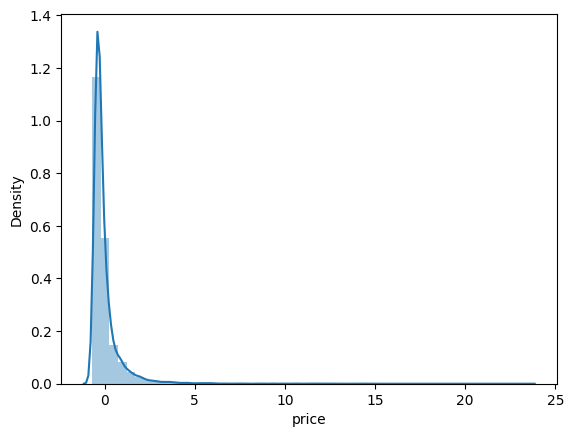

In [103]:
sns.distplot(scaled_data['price'])

In [104]:
from sklearn.preprocessing import StandardScaler
sc=  StandardScaler()

In [105]:
sc.fit(df[['price']])

,copy,True
,with_mean,True
,with_std,True


In [106]:
sc_data = sc.transform(df[['price']])

In [107]:
sc_data = sc_data.reshape(-1)

<Axes: ylabel='Density'>

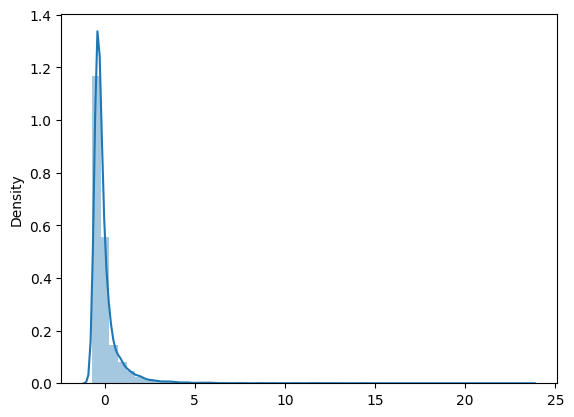

In [108]:
sns.distplot(sc_data)

## Detect and Remove Outliers

In [109]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


<Axes: xlabel='price', ylabel='Density'>

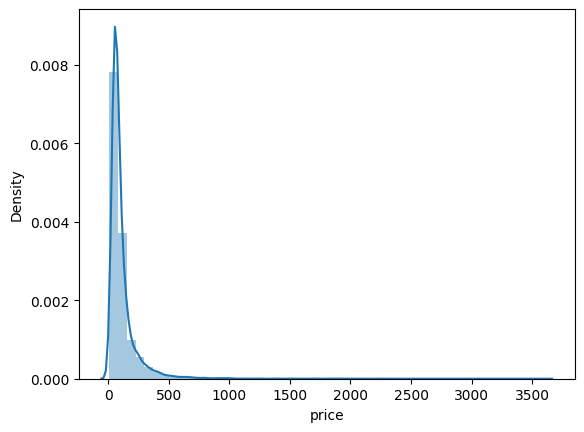

In [110]:
sns.distplot(df['price'])

<Axes: ylabel='price'>

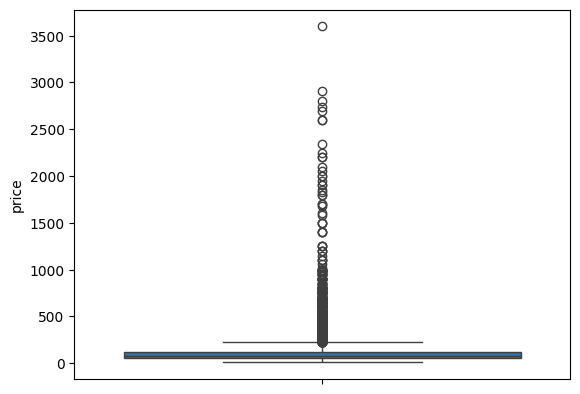

In [111]:
# to see outliers clearly
sns.boxplot(df['price'])

 ## Z-Score Method

In [112]:
## find the limits
upper_limit = df['price'].mean() + 3 * df['price'].std()
lower_limit = df['price'].mean() - 3 * df['price'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 559.4806478105236
lower limit: -334.34939480752064


In [113]:
## ## find the outliers
df.loc[(df['price'] > upper_limit) | (df ['price']<lower_limit )]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0
...,...,...,...,...,...,...,...,...,...
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0
13119,Plot Area,Ready To Move,Sathya Sai Layout,4 Bedroom,Prowshi,6688,6.0,1.0,700.0
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.0


## Trimming - delete the outlier data

In [114]:

new_df = df.loc[(df['price'] < lower_limit) & (df['price'] > upper_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df) - len(new_df) )

old data: 13320
new data: 0
outliers: 13320


<Axes: >

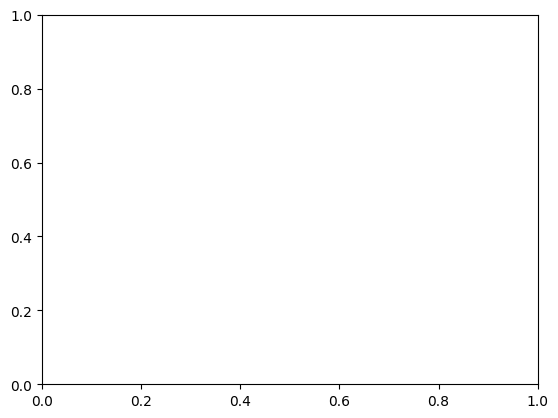

In [115]:
sns.boxplot(new_df['price'])

## Capping

In [116]:
new_df = df.copy()
new_df.loc[new_df['price']>upper_limit, 'price']= upper_limit
new_df.loc[new_df['price']<upper_limit, 'price']= lower_limit

<Axes: ylabel='price'>

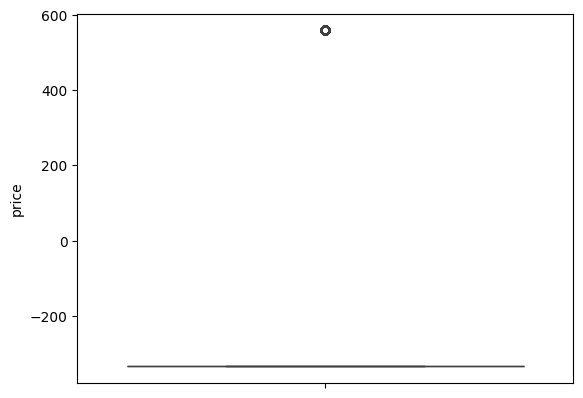

In [117]:
sns.boxplot(new_df['price'])

In [118]:
len(new_df)

13320

## inter_Quratile Range_method

In [119]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1


In [120]:
q1, q3, iqr

(np.float64(50.0), np.float64(120.0), np.float64(70.0))

In [121]:
upper_limit=q3+ +(1.5 *iqr)
lower_limit=q1-(1.5 *iqr)
lower_limit, upper_limit

(np.float64(-55.0), np.float64(225.0))

<Axes: ylabel='price'>

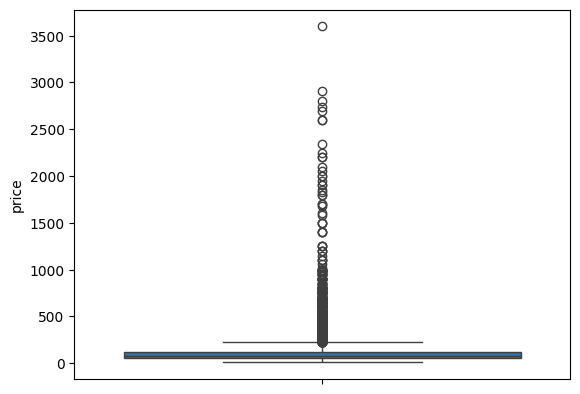

In [122]:
sns.boxplot(df['price'])

In [123]:

## ## find the outliers
df.loc[(df['price'] > upper_limit) | (df ['price']<lower_limit )]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
18,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,PeBayle,2770,4.0,2.0,290.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
...,...,...,...,...,...,...,...,...,...
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.0
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0


In [124]:
## trimming
new_df = df.loc[(df['price'] < lower_limit) & (df['price'] > upper_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df) - len(new_df) )

old data: 13320
new data: 0
outliers: 13320


<Axes: >

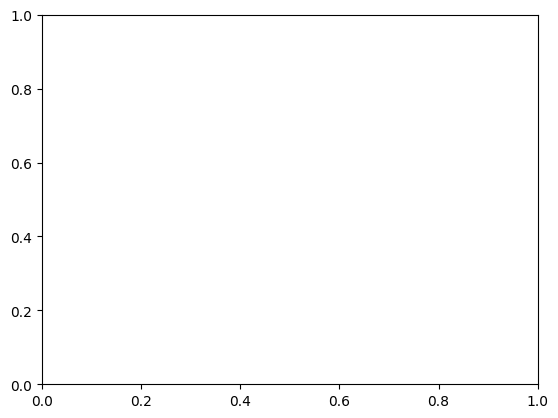

In [125]:
sns.boxplot(new_df['price'])

In [126]:
new_df = df.copy()
new_df.loc[new_df['price']>upper_limit, 'price']= upper_limit
new_df.loc[new_df['price']<upper_limit, 'price']= lower_limit

<Axes: ylabel='price'>

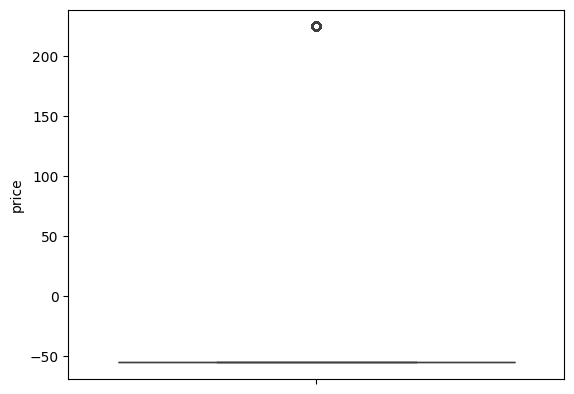

In [127]:
sns.boxplot(new_df['price'])

In [128]:
len(new_df)

13320

## Percentile Method

In [129]:
upper_limit = df['price'].quantile(0.99)
upper_limit = df['price'].quantile(0.01)
print('upper limit', upper_limit)
print('lower limit', lower_limit)


upper limit 18.5
lower limit -55.0


<Axes: ylabel='price'>

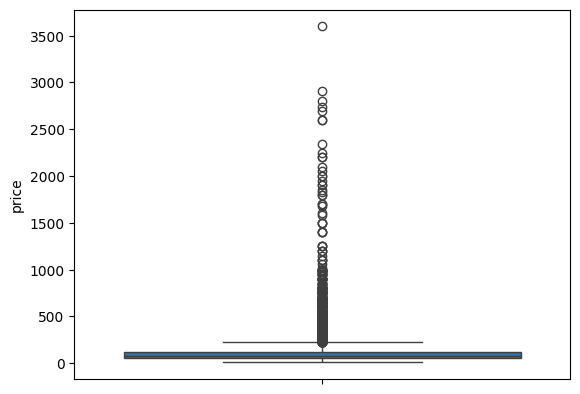

In [130]:
sns.boxplot(df['price'])

In [131]:
df.loc[(df['price'] > upper_limit) | (df ['price']<lower_limit )]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [132]:
## trimming
new_df = df.loc[(df['price'] <= lower_limit) & (df['price'] >= upper_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df) - len(new_df) )

old data: 13320
new data: 0
outliers: 13320


## One-Hot Encoding

In [133]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [134]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [135]:

ohe.fit_transform(df[['area_type']]).toarray()


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(13320, 4))

In [136]:

ohe_values = ohe.fit_transform(df[['area_type']]).toarray()
ohe_df = pd.DataFrame(ohe_values, columns=ohe.get_feature_names_out(['area_type']))
enc_df = pd.concat([df, ohe_df], axis=1)
enc_df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,0.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,0.0,1.0,0.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1.0,0.0,0.0,0.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,0.0,1.0


In [137]:
## ohe using pandas
enc_df=pd.get_dummies(df,prefix=['area_type'], columns= ['area_type'],drop_first=True)
enc_df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,False,False,True
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,False,True,False
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,False,False,False
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,False,False,True
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,False,False,True


## Mean/Target Enconding

In [140]:
df =pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#mapping_dict = {
   # 'Iris-setosa': 0,
   # 'Iris-versicolor': 1,
   # 'Iris-virginica': 2}

#df['Species_encoded'] = df['Species'].map(mapping_dict)


In [ ]:
from category_encoders import TargetEncoder
import pandas as pd


df = pd.read_csv('Iris.csv')

cols = ['SepalLengthCm', 'SepalWidthCm']
target = 'Species'

for col in cols:
    te = TargetEncoder()
    te.fit(X=df[col], y=df[target])
    values = te.transform(df[col]) 
    df = pd.concat([df, values.add_suffix(f'_{col}_encoded')], axis=1)

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_SepalLengthCm_encoded,SepalWidthCm_SepalWidthCm_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,5.1,3.5
1,2,4.9,3.0,1.4,0.2,Iris-setosa,4.9,3.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,4.7,3.2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4.6,3.1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,5.0,3.6


In [153]:
df.sample(frac=1).head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_SepalLengthCm_encoded,SepalWidthCm_SepalWidthCm_encoded
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,6.1,3.0
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,6.7,3.0
89,90,5.5,2.5,4.0,1.3,Iris-versicolor,5.5,2.5
106,107,4.9,2.5,4.5,1.7,Iris-virginica,4.9,2.5
6,7,4.6,3.4,1.4,0.3,Iris-setosa,4.6,3.4
121,122,5.6,2.8,4.9,2.0,Iris-virginica,5.6,2.8
113,114,5.7,2.5,5.0,2.0,Iris-virginica,5.7,2.5
93,94,5.0,2.3,3.3,1.0,Iris-versicolor,5.0,2.3
23,24,5.1,3.3,1.7,0.5,Iris-setosa,5.1,3.3
78,79,6.0,2.9,4.5,1.5,Iris-versicolor,6.0,2.9


## Frequency Encoding

In [157]:
df = pd.read_csv('Train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [160]:
df.groupby('Education').size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [166]:
# group by frequency
freq = df['Education'].value_counts() / len(df)
# map the values using the correct column name
df['Education_freq'] = df['Education'].map(freq)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_freq
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.781759
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.781759
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.781759
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.218241
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.781759


## Binary Encoding

In [ ]:
# 0 0- 0
#0 1 - 1
#0 0 - 2
#1 1 - 3

In [169]:
%pip install category_encoders
from category_encoders import BinaryEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
be = BinaryEncoder()
be_enc=be.fit_transform(df[['Self_Employed']])


In [178]:
enc_df = pd.concat([df, be_enc],axis=1)
enc_df.sample(frac=1).head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_freq,Self_Employed_0,Self_Employed_1
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y,0.781759,1,0
47,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y,0.781759,0,1
178,LP001616,Male,Yes,1,Graduate,No,3750,0.0,116.0,360.0,1.0,Semiurban,Y,0.781759,0,1
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y,0.781759,0,1
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N,0.781759,0,1
121,LP001430,Female,No,0,Graduate,No,4166,0.0,44.0,360.0,1.0,Semiurban,Y,0.781759,0,1
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y,0.781759,0,1
574,LP002863,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban,N,0.781759,0,1
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y,0.781759,0,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.218241,0,1
